In [26]:
import pandas
import numpy
from pyforest import *
file ='C:\\Users\\Shree\\\\Downloads\\CCTech\\Classification\\challenge2_dataset.csv'
dataset = pandas.read_csv(file)

In [2]:
# Peek at the data
print(dataset.head(10))

      1     2     3 Target
0  0.60  0.31  13.0  False
1  0.74  0.33  21.0  False
2  0.54  0.19   NaN   True
3  0.46   NaN   9.0  False
4  0.77  0.15  15.0   True
5  0.46  0.17  18.0  False
6  0.49  0.26  10.0  False
7  0.40  0.12  19.0   True
8  0.77  0.17  13.0   True
9  0.69  0.28  14.0  False


In [3]:
# Statistical summary
print(dataset.describe())

                 1            2            3
count  1992.000000  1992.000000  1993.000000
mean      1.488800     1.741546    16.333166
std      22.145983    58.456685    42.407440
min       0.400000     0.100000     0.000000
25%       0.490000     0.150000    12.000000
50%       0.600000     0.220000    15.000000
75%       0.710000     0.300000    19.000000
max     600.000000  2600.000000  1900.000000


In [4]:
#Checking the DataType
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
1         1992 non-null float64
2         1992 non-null float64
3         1993 non-null float64
Target    1984 non-null object
dtypes: float64(3), object(1)
memory usage: 62.4+ KB


In [5]:
#checking the null values
dataset.isna().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [62]:
#Checking the How any missing values in the data
missing_percentage = (dataset.isna().sum() / dataset.shape[0])*100
missing_percentage

1         0.150376
2         0.150376
3         0.100251
Target    0.551378
dtype: float64

Here we can see that the very little part of the data is missing, so can drop the missing the values.

In [6]:
#Dropping the null values
dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [7]:
dataset.isna().sum()

1         0
2         0
3         0
Target    0
dtype: int64

In [9]:
from sklearn import preprocessing 

In [10]:
# Encoding the Boolean into '0' and '1'
bool_map = {True:1,False:0}
dataset.Target.replace(bool_map,inplace=True)

In [12]:
dataset.head()

,1,2,3,Target
0,0.60,0.31,13.0,0
1,0.74,0.33,21.0,0
4,0.77,0.15,15.0,1
5,0.46,0.17,18.0,0
6,0.49,0.26,10.0,0


In [14]:
# Split-out validation dataset
array = dataset.values
X = dataset[['1','2','3']]
Y = dataset['Target']
validation_size = 0.20

In [15]:
from sklearn.model_selection import train_test_split
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
# Evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.799490 (0.026883)
KNN: 0.970273 (0.008511)
CART: 0.963307 (0.016708)
NB: 0.244793 (0.044546)


C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: Fut

SVM: 0.922813 (0.028590)


C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shree\Anaconda331\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


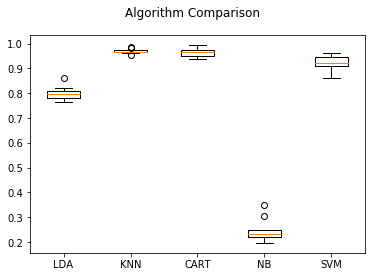

In [22]:
# Compare Algorithms
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here we can see that the CART algorithm gives the good score. we can consider ti for further prediction.

In [30]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9646464646464646
[[299   5]
 [  9  83]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       304
           1       0.94      0.90      0.92        92

    accuracy                           0.96       396
   macro avg       0.96      0.94      0.95       396
weighted avg       0.96      0.96      0.96       396



In [31]:
# Finalize model
import pickle
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Save model to disk
filename = 'Final_Model.sav'
pickle.dump(cart_model, open(filename, 'wb'))

In [33]:
cd

C:\Users\Shree


In [36]:
# Load model from disk and use it to make new predictions
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

0.9646464646464646


In [41]:
#Pre-process the model
file2 ='C:\\Users\\Shree\\\\Downloads\\CCTech\\Classification\\challenge2_prediction.csv'
test = pandas.read_csv(file2)
test.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [44]:
#Check for Null Values
test.isna().sum()

1    4
2    5
3    4
dtype: int64

In [45]:
#Dropping the Null Values
test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [46]:
test.isna().sum()

1    0
2    0
3    0
dtype: int64

In [47]:
#Checking DataTypes
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 854
Data columns (total 3 columns):
1    844 non-null float64
2    844 non-null float64
3    844 non-null float64
dtypes: float64(3)
memory usage: 26.4 KB


In [49]:
column_1 = test['1']
column_2 = test['2']
column_3 = test['3']

In [50]:
#Saving the preprocessed file
sub = pd.DataFrame({'1' : column_1,
                    '2' : column_2, 
                    '3' : column_3,})
sub.to_csv('Test_classification.csv', index=False)

After preprocessing we saved our prediction file as Tesr_classification. which we will use to predict by using saved algorithm.

In [51]:
#Locating the Saved file
cd

C:\Users\Shree


In [56]:
# Load test dataset
final_predict = pd.read_csv('Test_classification.csv', delimiter=",")
X_train = final_predict
pred = cart_model.predict(X_train)
print(pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 

__[Note: Here  "1 = True", "0 = False", as we previously mapped the boolean(Encoded) ]__

In [59]:
#Saving the predicted file
sub = pd.DataFrame({'1' : column_1,
                    '2' : column_2, 
                    '3' : column_3,
                    'Target': pred})
sub.to_csv('Classification_Final_prediction.csv', index=False)

In [60]:
cd

C:\Users\Shree


Further we can check the accuracy of predicted class.